In [77]:
import os
import librosa
import librosa.display
import IPython.display as ipd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from itertools import cycle
from tqdm import tqdm
#sns.set_theme(style="white", palette=None)
#color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
#color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [78]:
audio_files=glob("C:/Users/User/EDD_audio/EATD-Corpus/*/*.wav")
#ipd.Audio(audio_files[0])
y, sr=librosa.load(audio_files[0]) #The raw output is y, sample rate is sr
print(f'y:{y[:10]}')
print(f'shape:{y.shape}')
print(f'sr:{sr}')

y:[-0.0004549  -0.00093566 -0.00131146 -0.0019391  -0.00405368 -0.00669364
 -0.00667909 -0.00430984 -0.00312145 -0.00344555]
shape:(592043,)
sr:22050


<Axes: title={'center': 'Raw audio zoomed in example'}>

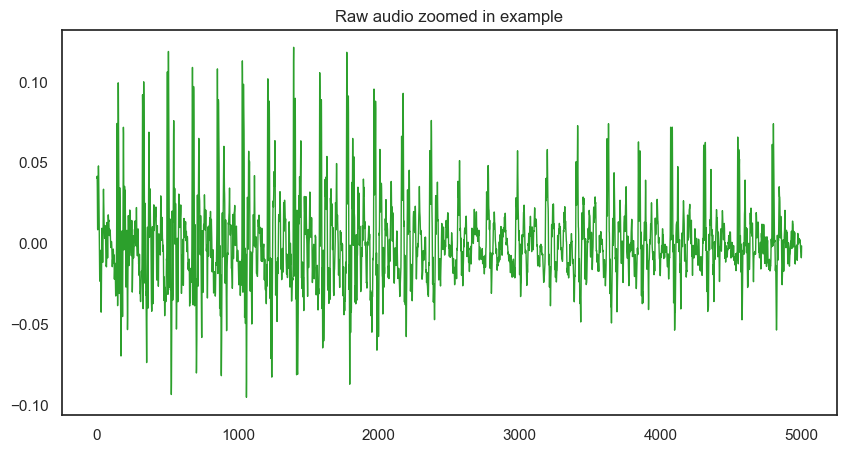

In [79]:
#pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw audio example")

y_trimmed, _= librosa.effects.trim(y, top_db=20)
#pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Raw audio trimmed example", color=color_pal[1])

pd.Series(y_trimmed[5000:10000]).plot(figsize=(10,5), lw=1, title="Raw audio zoomed in example", color=color_pal[2])

In [97]:
# Function to extract features from audio files
def extract_features(file_path):
    try:
        # Load audio file
        audio_data, _ = librosa.load(file_path, res_type='kaiser_fast')
        print("audio loaded")
        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13), axis=1)
        chroma = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr), axis=1)
        mel = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sr), axis=1)
        # Combine all features into one array
        print("features combined")
        return np.hstack((mfccs, chroma, mel))
    except Exception as e:
        print(f"Error encountered while processing {file_path}: {e}")
        return None
  
# Function to preprocess the entire dataset
def preprocess_dataset(dataset_path):
    data = []
    labels = []
    # Traverse through all files in the dataset directory
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith("out.wav"):
                file_path = os.path.join(root, file).replace('\\','/')
                # Extract features
                features = extract_features(file_path)
                print(f'features:{features}')
                if features is not None:
                    data.append(features)
                    print("features appended")
                # Extract label from the file path (assuming directory structure)
                    if file.startswith("positive"):
                        class_label='positive'
                    elif file.startswith("neutral"):
                        class_label='neutral'
                    else:
                        class_label='negative'
                    labels.append(class_label)
                    print("labels appended")
    # Convert lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)
    # Create a DataFrame for easy handling
    df = pd.DataFrame(data)
    df['label'] = labels
    return df

In [98]:
#files = librosa.util.find_files('EATD-Corpus')
data_dir = "EATD-Corpus"
preprocessed_data = preprocess_dataset(dataset_path)
preprocessed_data.to_csv('preprocessed_dataset.csv', index=False)

Error encountered while processing C:/Users/User/EDD_audio/EATD-Corpus/t_1/negative_out.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
features:None
Error encountered while processing C:/Users/User/EDD_audio/EATD-Corpus/t_1/neutral_out.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
features:None
Error encountered while processing C:/Users/User/EDD_audio/EATD-Corpus/t_1/positive_out.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py, line 33, 

In [102]:
# Function to load audio files and apply Fourier transform
def load_and_preprocess_audio(file_path, sample_rate=22050, n_fft=2048, hop_length=512):
    try:
        # Load audio file with librosa
        print("starting function")
        audio_data, _ = librosa.load(file_path, sr=sample_rate)
        print("data loaded")
        # Apply Short-Time Fourier Transform (STFT)
        stft = np.abs(librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length))
        # Log-amplitude transform
        log_stft = librosa.amplitude_to_db(stft, ref=np.max)
        # Normalize the audio data
        normalized_audio = (log_stft - np.mean(log_stft)) / np.std(log_stft)
        return normalized_audio
    except Exception as e:
        print(f"Error encountered while processing {file_path}: {e}")
        return None

#'Im using the EATD corpus dataset for classifying depression from audio files. I want to apply fourier transform on the files first. 
#Could you write me a code for preprocessing the dataset and normalising the audio files so that they are all uniform?
# Directory containing your audio files (change this to your dataset path)
dataset_dir = "EATD-Corpus"
# List to store processed audio files
processed_data = []

# Iterate over files in the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('out.wav'):  # Assuming all files are .wav format
        file_path = os.path.join(dataset_dir, filename).replace('\\','/')
        print(file_path)
        # Load and preprocess audio
        processed_audio = load_and_preprocess_audio(file_path)
        if processed_audio is not None:
            processed_data.append(processed_audio)

# Convert processed_data to numpy array
processed_data = np.array(processed_data)

# Shape of processed_data array (number of samples, number of frequency bins, number of time steps)
print("Processed data shape:", processed_data.shape)


Processed data shape: (0,)


In [ ]:
D=librosa.stft(y)
S_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db, x_axis="time", y_axis="log", ax=ax)
ax.set_title('Spectrogram example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
S=librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,)
S_db_mel=librosa.amplitude_to_db(S, ref=np.max)

fig, ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db_mel, x_axis="time", y_axis="log", ax=ax)
ax.set_title('Mel-Spectrogram example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()